# **Yulu - Hypothesis Testing**

---



In [1]:
#Importing the necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the data and displaying the same

data = pd.read_csv("bike_sharing.csv")
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


# **Basic Analysis**

In [3]:
data.shape

(10886, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
data.isna().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


In [6]:
data.nunique()

,0
datetime,10886
season,4
holiday,2
workingday,2
weather,4
temp,49
atemp,60
humidity,89
windspeed,28
casual,309


In [7]:
#Converting date time column to date time format

data["datetime"] = pd.to_datetime(data["datetime"])
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [8]:
#Converting categorical variable to category

data["season"] = data["season"].astype("category")
data["holiday"] = data["holiday"].astype("category")
data["workingday"] = data["workingday"].astype("category")
data["weather"] = data["weather"].astype("category")

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: category(4), datetime64[ns](1), float64(3), int64(4)
memory usage: 723.7 KB


In [10]:
data["season"].value_counts()

,count
season,
4,2734
2,2733
3,2733
1,2686


In [11]:
data["holiday"].value_counts()

,count
holiday,
0,10575
1,311


In [12]:
data["workingday"].value_counts()

,count
workingday,
1,7412
0,3474


In [13]:
data["weather"].value_counts()

,count
weather,
1,7192
2,2834
3,859
4,1


In [14]:
data.describe()

,datetime,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


In [15]:
data.describe(include = "category")

,season,holiday,workingday,weather
count,10886,10886,10886,10886
unique,4,2,2,4
top,4,0,1,1
freq,2734,10575,7412,7192


# **Graphical Analysis**

In [16]:
#Creating Correlation

data.corr(numeric_only = True)

,temp,atemp,humidity,windspeed,casual,registered,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948
count,0.394454,0.389784,-0.317371,0.101369,0.690414,0.970948,1.000000


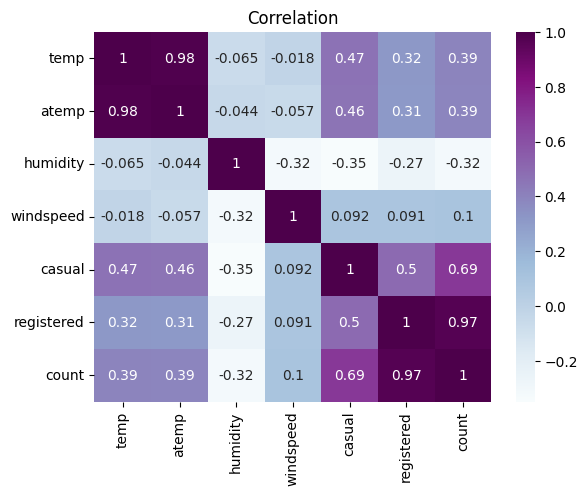

In [17]:
sns.heatmap(data = data.corr(numeric_only = True) , annot = True, cmap = "BuPu")
plt.title("Correlation")

plt.show()

**Insights :**


*   Temperature is highly correlated with observed temperature followed by the casual bookings done.

*   Humidity is very much least correlated with all the other parameters present.

*   Windspeed is comparitively correlated with the total number of bookings done.

*   Casual booking is highly correlated with total number of rides booked followed by registered bookings.

*   Registered bookings are higly correlated with the total number of bookings.

**Univarient Analysis**

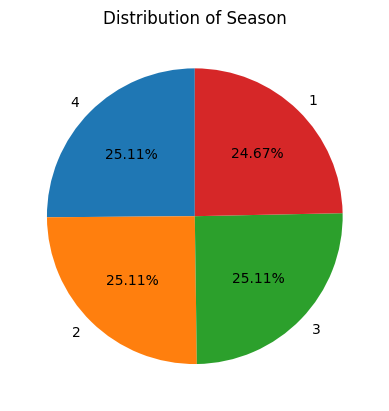

In [18]:
plt.pie(data["season"].value_counts() , labels=data["season"].value_counts().index , startangle=90 , autopct = "%0.2f%%")
plt.title("Distribution of Season")

plt.show()

**Insights :**


*   Almost all the 4 seasons are equally distributed and the rides are booked equally.



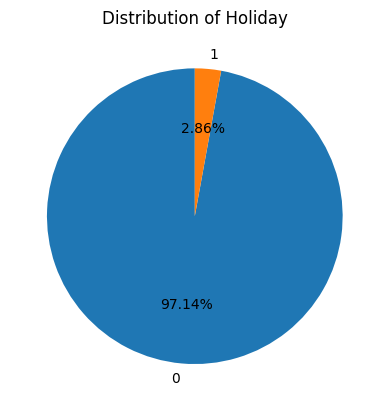

In [19]:
plt.pie(data["holiday"].value_counts() , labels=data["holiday"].value_counts().index , startangle=90 , autopct = "%0.2f%%")
plt.title("Distribution of Holiday")

plt.show()

**Insights :**


*   Almost 97% of the days are holidays and very minimal days were worked.

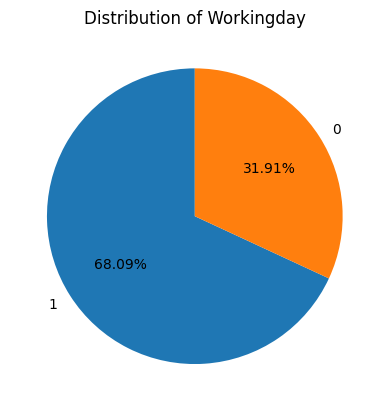

In [20]:
plt.pie(data["workingday"].value_counts() , labels=data["workingday"].value_counts().index , startangle=90 , autopct = "%0.2f%%")
plt.title("Distribution of Workingday")

plt.show()

**Insights :**



*   Almost 68% of the rides are booked on a working day which contributes to majority rides whereas 32% rides are booked either on a holiday or weekends.


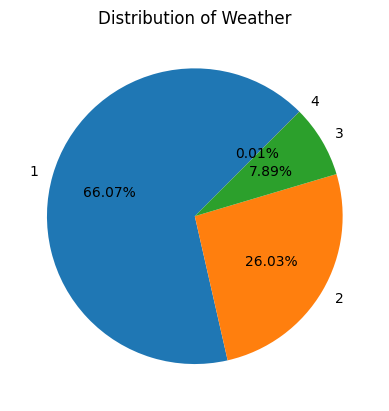

In [21]:
plt.pie(data["weather"].value_counts() , labels=data["weather"].value_counts().index , startangle=45 , autopct = "%0.2f%%" )
plt.title("Distribution of Weather")

plt.show()

**Insights :**



*   Most of the rides are booked in clear weather followed by misty weather , light rain and the bookings are very least on heavy rain days.


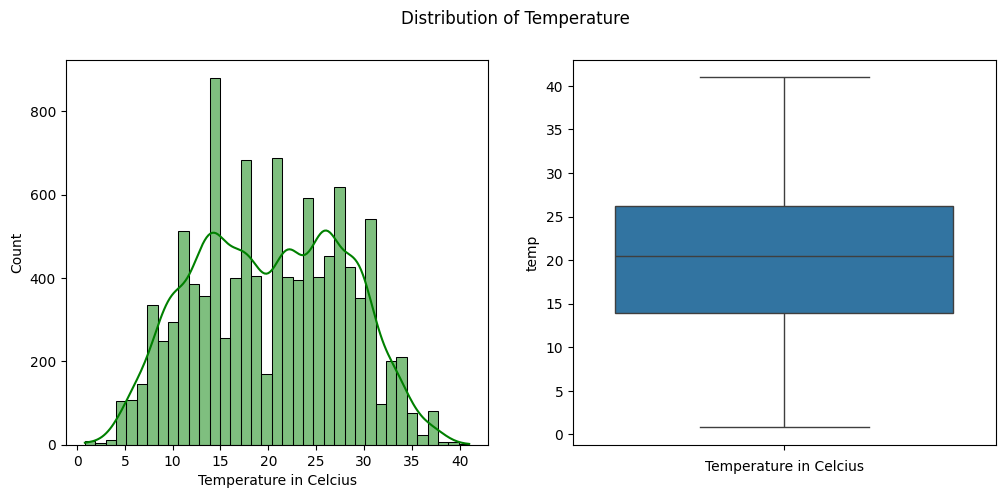

In [22]:
plt.figure(figsize = (12,5)).suptitle("Distribution of Temperature")

plt.subplot(1,2,1)
sns.histplot(data["temp"] , kde = True , color = "Green")
plt.xlabel("Temperature in Celcius")

plt.subplot(1,2,2)
sns.boxplot(data["temp"])
plt.xlabel("Temperature in Celcius")

plt.show()

**Insights :**



*   The distribution of temperature is neither left nor right skewed. Also it doesnt form a normal distribution.
*   From the box plot we can infer that the mean temperature is around 20 degree celsius with no outliers.


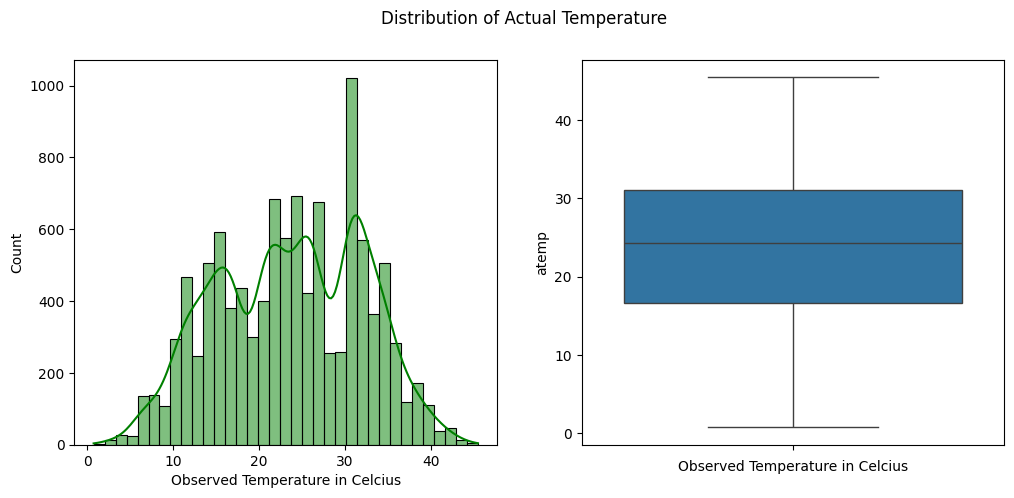

In [23]:
plt.figure(figsize = (12,5)).suptitle("Distribution of Actual Temperature")

plt.subplot(1,2,1)
sns.histplot(data["atemp"] , kde = True , color = "Green")
plt.xlabel("Observed Temperature in Celcius")

plt.subplot(1,2,2)
sns.boxplot(data["atemp"])
plt.xlabel("Observed Temperature in Celcius")

plt.show()

**Insights :**

*   The distribution of observed temperature is neither left nor right skewed. Also it doesnt form a normal distribution.
*   From the box plot we can infer that the mean observed temperature is around 25 degree celsius with no outliers.


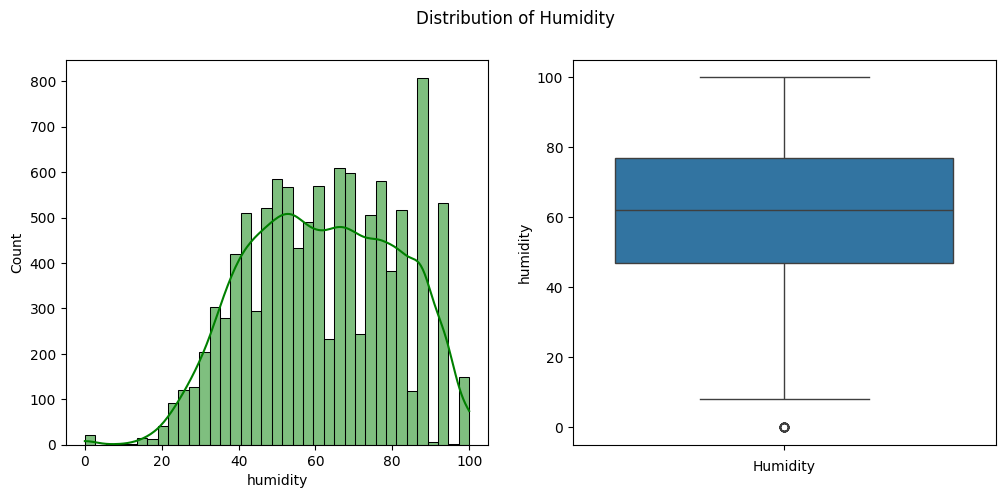

In [24]:
plt.figure(figsize = (12,5)).suptitle("Distribution of Humidity")

plt.subplot(1,2,1)
sns.histplot(data["humidity"] , kde = True , color = "Green")

plt.subplot(1,2,2)
sns.boxplot(data["humidity"])
plt.xlabel("Humidity")

plt.show()

**Insights :**

*   The distribution of humidity is left skewed.
*   From the box plot we can infer that the mean humidity is around 60 with very minimal outlier.


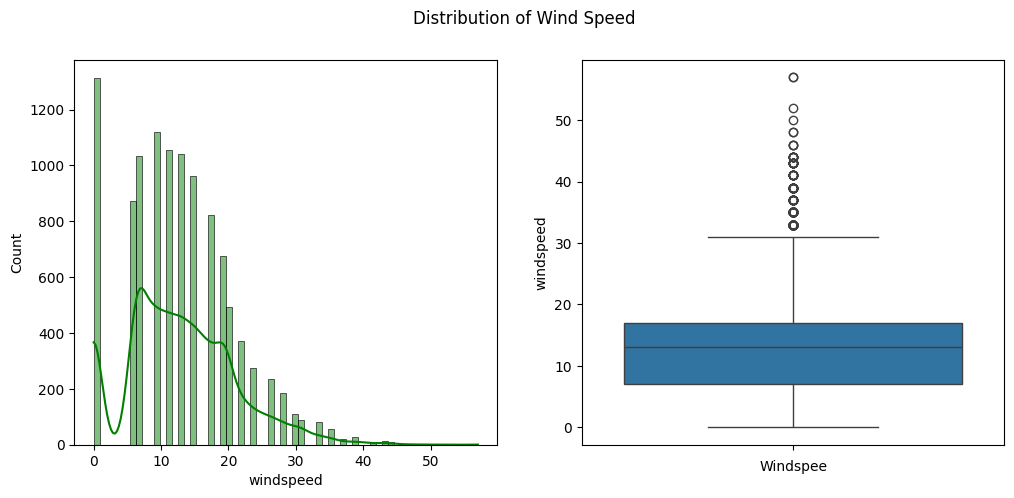

In [25]:
plt.figure(figsize = (12,5)).suptitle("Distribution of Wind Speed")

plt.subplot(1,2,1)
sns.histplot(data["windspeed"] , kde = True , color = "Green")

plt.subplot(1,2,2)
sns.boxplot(data["windspeed"])
plt.xlabel("Windspee")

plt.show()

**Insights :**

*   The distribution of windspeed is right skewed.
*   From the box plot we can infer that the mean windspeed is around 20 with outliers.


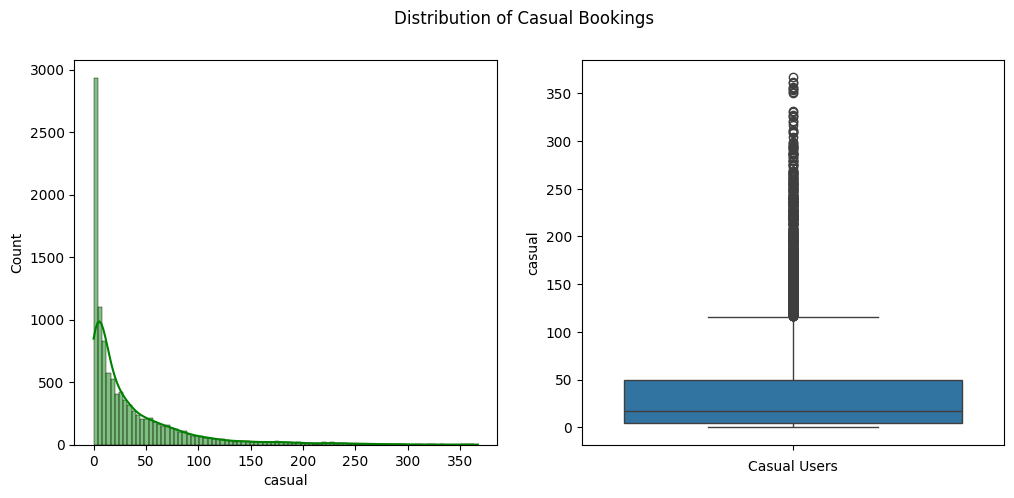

In [26]:
plt.figure(figsize = (12,5)).suptitle("Distribution of Casual Bookings")

plt.subplot(1,2,1)
sns.histplot(data["casual"] , kde = True , color = "Green")

plt.subplot(1,2,2)
sns.boxplot(data["casual"])
plt.xlabel("Casual Users")

plt.show()

**Insights :**

*   The distribution of casual bookings is right skewed.
*   From the box plot we can infer that the mean number of casual bookings is around 20 with huge number of outliers.

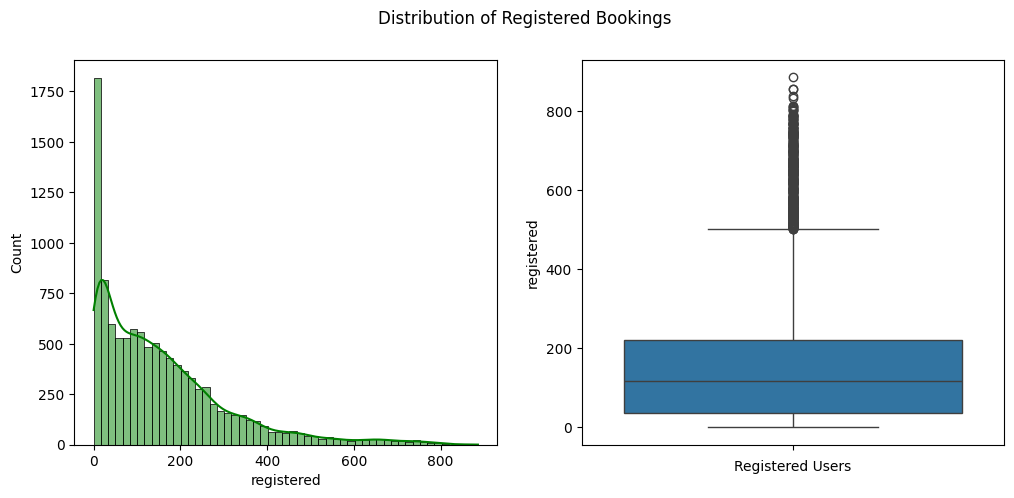

In [27]:
plt.figure(figsize = (12,5)).suptitle("Distribution of Registered Bookings")

plt.subplot(1,2,1)
sns.histplot(data["registered"] , kde = True , color = "Green")

plt.subplot(1,2,2)
sns.boxplot(data["registered"])
plt.xlabel("Registered Users")

plt.show()

**Insights :**

*   The distribution of right bookings is right skewed.
*   From the box plot we can infer that the mean number of casual bookings is around 150 with huge number of outliers.

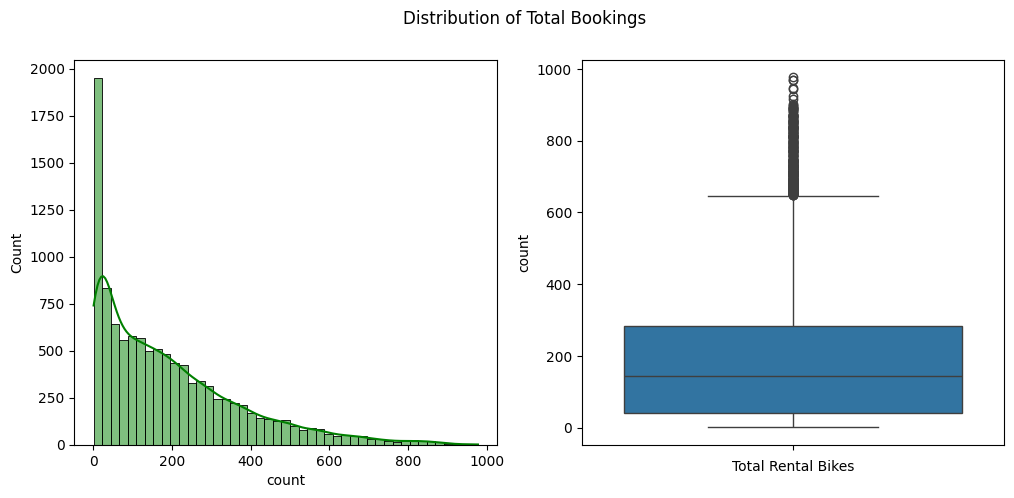

In [28]:
plt.figure(figsize = (12,5)).suptitle("Distribution of Total Bookings")

plt.subplot(1,2,1)
sns.histplot(data["count"] , kde = True , color = "Green")

plt.subplot(1,2,2)
sns.boxplot(data["count"])
plt.xlabel("Total Rental Bikes")

plt.show()

**Insights :**

*   The distribution of total bookings is right skewed.
*   From the box plot we can infer that the mean number of total bookings is around 160 with huge number of outliers.

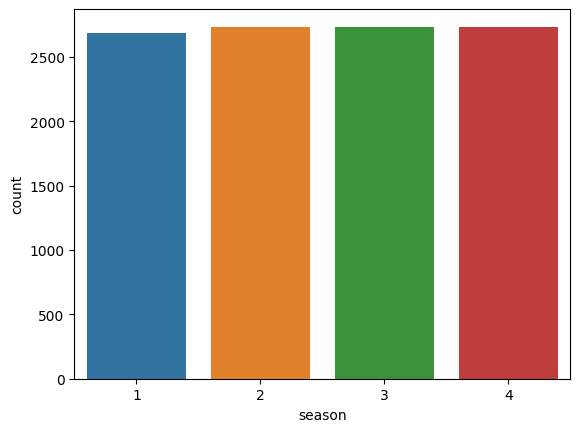

In [29]:
sns.countplot(x = "season" , data = data , hue = "season" , legend = False)

plt.show()

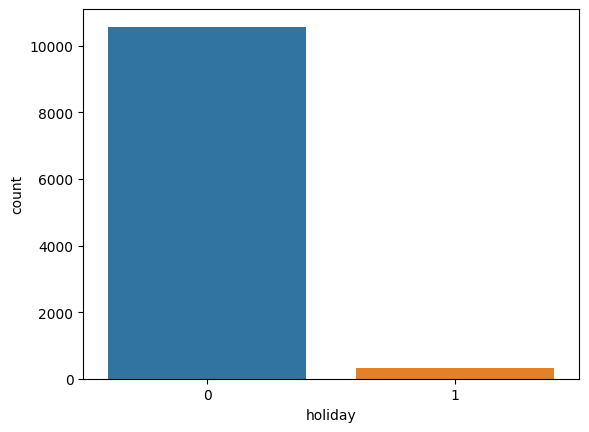

In [30]:
sns.countplot(x = "holiday" , data = data , hue = "holiday" , legend = False)

plt.show()

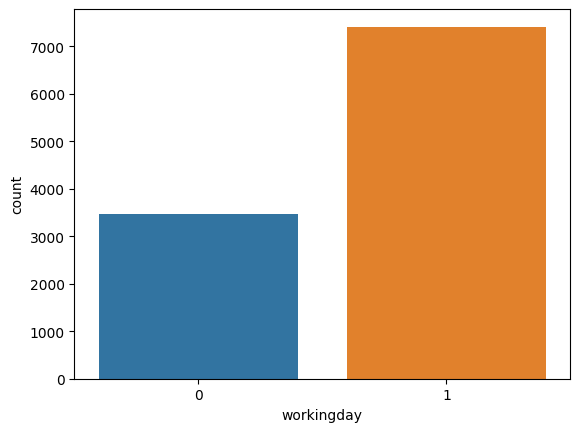

In [31]:
sns.countplot(x = "workingday" , data = data , hue = "workingday" , legend = False)

plt.show()

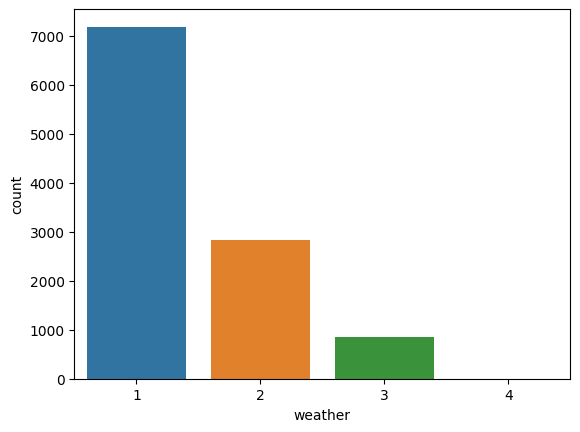

In [32]:
sns.countplot(x = "weather" , data = data , hue = "weather" , legend = False)

plt.show()

**Bivarient Analysis**

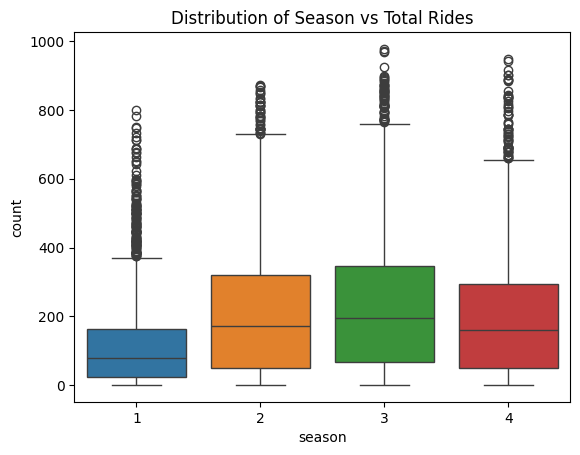

In [33]:
sns.boxplot(x = "season" , y = "count" , hue = "season", data = data , legend = False)
plt.title("Distribution of Season vs Total Rides")

plt.show()

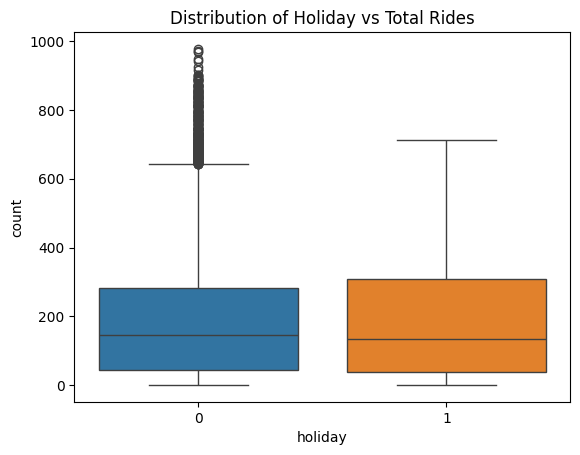

In [34]:
sns.boxplot(x = "holiday" , y = "count" , hue = "holiday", data = data , legend = False)
plt.title("Distribution of Holiday vs Total Rides")

plt.show()

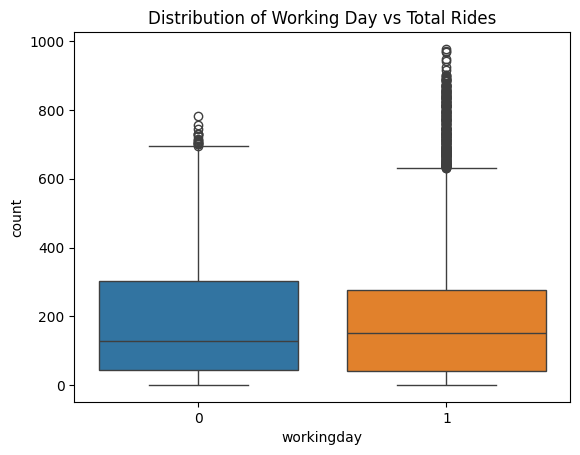

In [35]:
sns.boxplot(x = "workingday" , y = "count" , hue = "workingday", data = data , legend = False)
plt.title("Distribution of Working Day vs Total Rides")

plt.show()

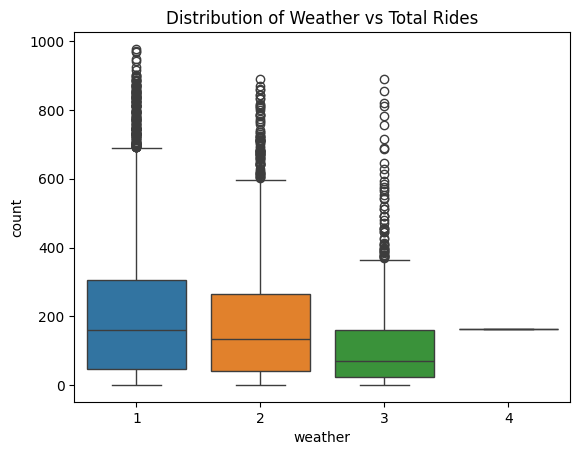

In [36]:
sns.boxplot(x = "weather" , y = "count" , hue = "weather", data = data , legend = False)
plt.title("Distribution of Weather vs Total Rides")

plt.show()

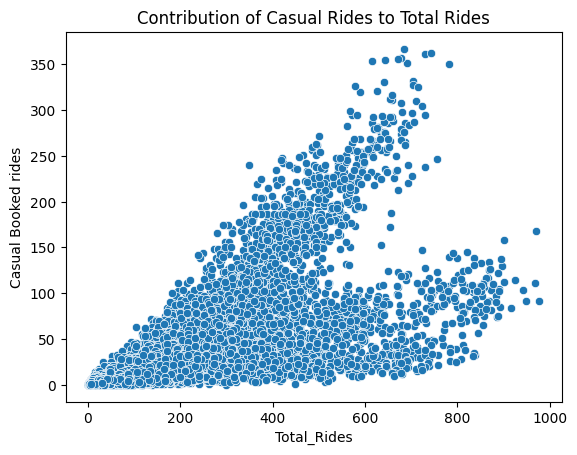

In [37]:
sns.scatterplot(x = "count" , y = "casual" , data = data)
plt.xlabel("Total_Rides")
plt.ylabel("Casual Booked rides")
plt.title("Contribution of Casual Rides to Total Rides")

plt.show()

**Insights :**


*   The casual bookings are less correlated with the total rides as the plots are scattered irregularly.

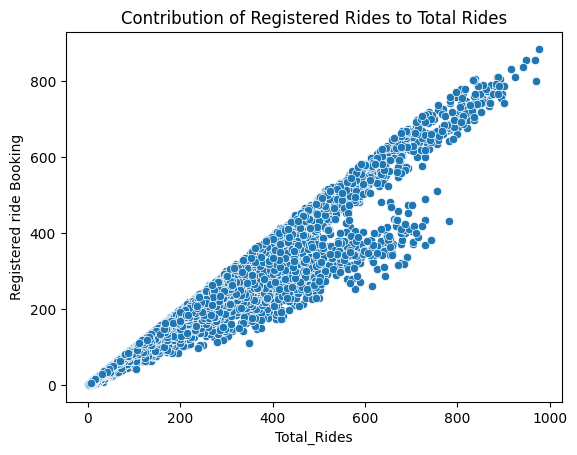

In [38]:
sns.scatterplot(x = "count" , y = "registered" , data = data)
plt.xlabel("Total_Rides")
plt.ylabel("Registered ride Booking")
plt.title("Contribution of Registered Rides to Total Rides")

plt.show()

**Insights :**


*   It is very clear from the above graph that registered rides are highly correlated with the total rides booked. Hence thereby forming a linearly scattered graph.

**Shapiro-Wilks Test For Normality**

In [39]:
#Importing the required Libraries

from scipy.stats import shapiro,kruskal,levene,kstest
from scipy.stats import norm,binom,zscore
from scipy.stats import ttest_1samp,ttest_ind,ttest_rel,f_oneway
from scipy.stats import chi2_contingency,chi2,chisquare
from scipy.stats import pearsonr,spearmanr
import statsmodels.api as sm

In [40]:
data.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

**Defining the null and alternate hypothesis :**

**H0 :** The data points are normally distributed.

**Ha :** The data points are not normally distributed.

In [41]:
for i in list(data.columns[5:]):

  print()
  print(f"Checking Normality Using Shapiro-Wilk Test for {i} :")
  print("-"*55)

  Statistics,p_value = shapiro(data[i])

  print(f"For {i} the test statistics is {Statistics} and the p-value is {p_value} ")

  if p_value < 0.05:
    print(f"At 95% confidence interval we reject the null hypothesis")
    print(f"Hence we can conclude that {i} is not normally distributed")
  else:
    print(f"At 95% confidence interval we fail to reject the null hypothesis")
    print(f"Hence we can conclude that {i} is normally distributed")

  print()
  print("-"*100)



Checking Normality Using Shapiro-Wilk Test for temp :
-------------------------------------------------------
For temp the test statistics is 0.9804052990118979 and the p-value is 4.4416921644612106e-36 
At 95% confidence interval we reject the null hypothesis
Hence we can conclude that temp is not normally distributed

----------------------------------------------------------------------------------------------------

Checking Normality Using Shapiro-Wilk Test for atemp :
-------------------------------------------------------
For atemp the test statistics is 0.9815304574471947 and the p-value is 3.220898326923054e-35 
At 95% confidence interval we reject the null hypothesis
Hence we can conclude that atemp is not normally distributed

----------------------------------------------------------------------------------------------------

Checking Normality Using Shapiro-Wilk Test for humidity :
-------------------------------------------------------
For humidity the test statistics is

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10886.
  res = hypotest_fun_out(*samples, **kwds)


**Insights :**



*   From the Shapiro Wilk Test its clear that none of the continuous variable is normally distributed.




---



# **Working Day has effect on number of electric cycles rented**

In [42]:
workingday_1 = data.loc[data["workingday"]==1 , "count"]
workingday_0 = data.loc[data["workingday"]==0 , "count"]

In [43]:
#Statistical Analysis

data.groupby("workingday")["count"].describe()

<ipython-input-43-d8344e3621ad>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby("workingday")["count"].describe()


,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,3474.0,188.506621,173.724015,1.0,44.0,128.0,304.0,783.0
1,7412.0,193.011873,184.513659,1.0,41.0,151.0,277.0,977.0


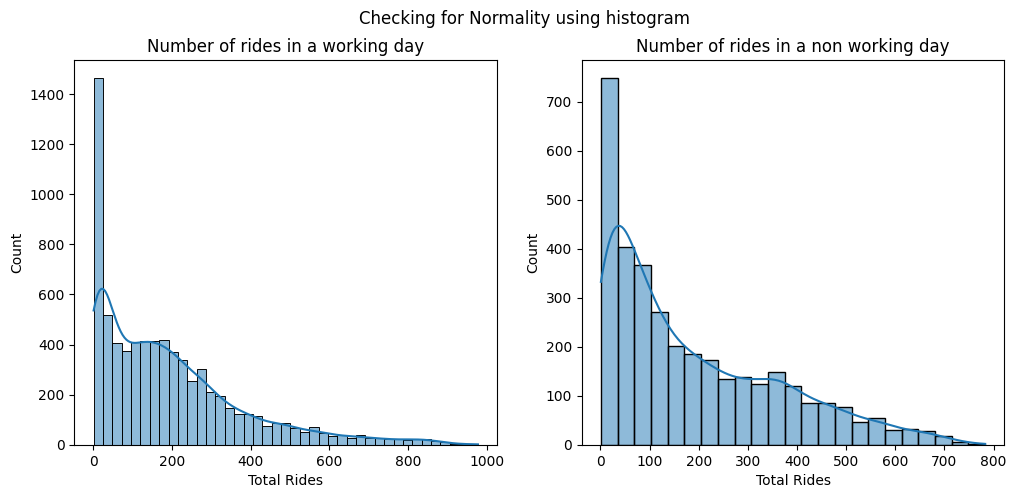

In [44]:
#Normality Check Using Histogram:

plt.figure(figsize = (12,5)).suptitle("Checking for Normality using histogram")

plt.subplot(1,2,1)
sns.histplot(workingday_1 , kde = True)
plt.xlabel("Total Rides")
plt.title("Number of rides in a working day")

plt.subplot(1,2,2)
sns.histplot(workingday_0 , kde = True)
plt.xlabel("Total Rides")
plt.title("Number of rides in a non working day")


plt.show()

**Insights :**


*   From the histogram we can see that either of working day nor a non working day is not normally distributed but they are right skewed.


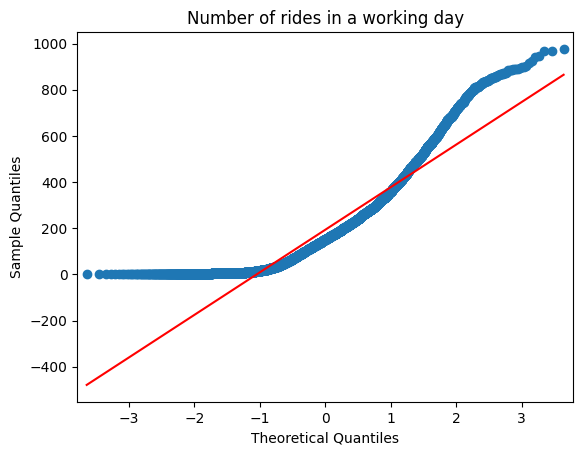

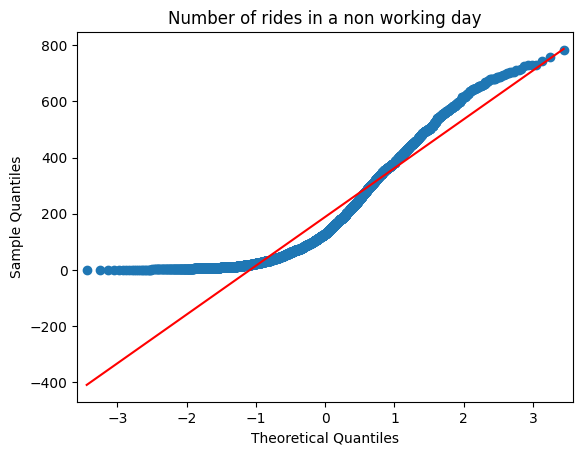

In [45]:
#Normality Check using QQ Plot

sm.qqplot(workingday_1, line = "s" )
plt.title("Number of rides in a working day")

sm.qqplot(workingday_0, line = "s")
plt.title("Number of rides in a non working day")

plt.show()

**Insights :**


*   From the QQ Plot we can see that either of working day nor a non working day is not normally distributed as most of the data points are distributed away from the line.

**Levenes Test :**

---



**Defining the null and alternate hypothesis :**

**H0 :** Both the samples have similar varience.

**Ha :** Both the samples have variable varience.

In [46]:
stat_value , p_value = levene(workingday_0 , workingday_1)

print(f"Levene Statistics : {stat_value}")
print(f"p-value : {p_value}")
print()

if p_value < 0.05:
  print("The samples do not have similar varience.")
else:
  print("The samples have similar varience.")


Levene Statistics : 0.004972848886504472
p-value : 0.9437823280916695

The samples have similar varience.


**Insights :**


*   Levenes test at 95% Confidence Interval proves that working day and non working day have a similar varience.


**Shapiro Wilk Test :**

---



**Defining the null and alternate hypothesis :**

**H0 :** The samples follow a normal distribution.

**Ha :** The samples do not follow a normal distribution.

In [47]:
#Normality check for Working Days

stat , p_value = shapiro(workingday_1)
print(f"shapiro_statistics : {stat}")
print(f"p-value : {p_value}")
print()

if p_value < 0.05:
  print("The sample doesnot follow Normal Distribution.")
else:
  print("The sample follows Normal Distribution.")
print()

shapiro_statistics : 0.8702545795617624
p-value : 2.2521124830019574e-61

The sample doesnot follow Normal Distribution.



/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7412.
  res = hypotest_fun_out(*samples, **kwds)


In [48]:
#Normality check for Non Working Days

stat , p_value = shapiro(workingday_0)
print(f"shapiro_statistics : {stat}")
print(f"p-value : {p_value}")
print()

if p_value < 0.05:
  print("The sample doesnot follow Normal Distribution.")
else:
  print("The sample follows Normal Distribution.")

shapiro_statistics : 0.885211755076074
p-value : 4.4728547627911074e-45

The sample doesnot follow Normal Distribution.


**Insight :**


*   From Shapiro Wilk Test at 95% Confidence Interval its clear that both working and non working days are not normally distributed.


**ttest - ind :**


---



**Defining the null and alternate hypothesis :**

**H0 :** The number of cycles rented on a working day is same as a non working day.

**Ha :** The number of cycles rented on a working day is different than a non working day.

In [49]:
test_stat , p_value = ttest_ind(workingday_0,workingday_1)

print(f"ttest_statistics : {test_stat}")
print(f"p-value : {p_value}")
print()

if p_value < 0.05:
  print("Reject the Null Hypothesis")
  print("The number of cycles rented on a working day is different than a non working day.")
else:
  print("Fail to Reject Null Hypothesis")
  print("The number of cycles rented on a working day is same as a non working day.")

ttest_statistics : -1.2096277376026694
p-value : 0.22644804226361348

Fail to Reject Null Hypothesis
The number of cycles rented on a working day is same as a non working day.


**Insight :**


*   Here we have to compare between two independent categories (ie) workday and non workday with a numeric variable (ie) total rides booked , hence we have used 2 sample t-test.

*   From the hypothesis testing with 95% confidence interval with significance level 5% the p-value is greater than the significane level (ie) alpha.
*   Hence we fail to reject the Null hypothesis. Therefore we can conclude that the number of cycles rented on a working day is same as a non working day, hence working day has no effect on the number of cycles rented.





---



# **No. of cycles rented similar or different in different seasons**

In [50]:
data.season.unique()

[1, 2, 3, 4]
Categories (4, int64): [1, 2, 3, 4]

In [51]:
#Statistical Analysis

data.groupby("season")["count"].describe()

<ipython-input-51-58f1f2eaa83a>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby("season")["count"].describe()


,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2686.0,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0
2,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
3,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
4,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


In [52]:
spring = data[data["season"]==1]["count"]
summer = data[data["season"]==2]["count"]
fall = data[data["season"]==3]["count"]
winter = data[data["season"]==4]["count"]

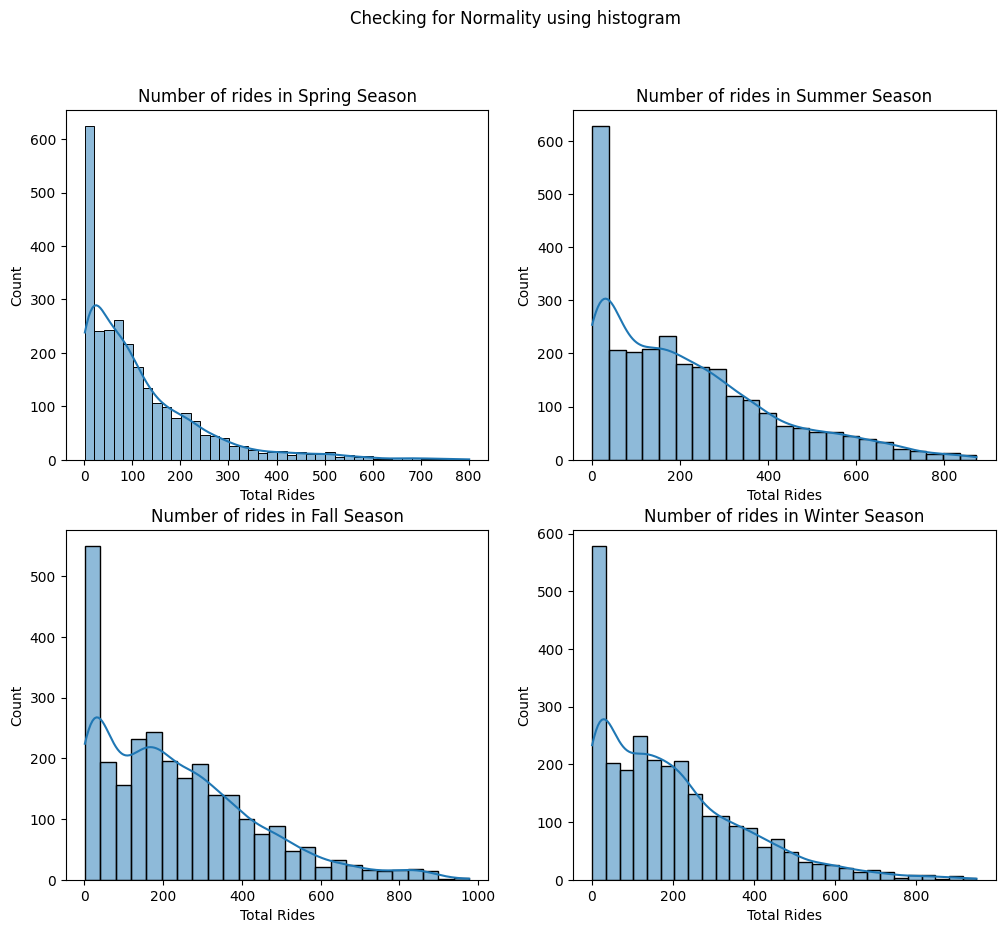

In [53]:
#Normality Check Using Histogram :

plt.figure(figsize = (12,10)).suptitle("Checking for Normality using histogram")

plt.subplot(2,2,1)
sns.histplot(spring , kde = True)
plt.xlabel("Total Rides")
plt.title("Number of rides in Spring Season")

plt.subplot(2,2,2)
sns.histplot(summer , kde = True)
plt.xlabel("Total Rides")
plt.title("Number of rides in Summer Season")

plt.subplot(2,2,3)
sns.histplot(fall , kde = True)
plt.xlabel("Total Rides")
plt.title("Number of rides in Fall Season")

plt.subplot(2,2,4)
sns.histplot(winter , kde = True)
plt.xlabel("Total Rides")
plt.title("Number of rides in Winter Season")

plt.show()

**Insights :**


*   From the histograms we can see that either of the seasons are not normally distributed but they are right skewed.


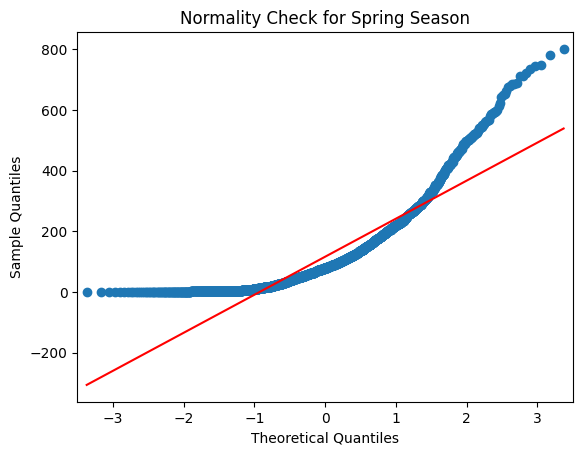

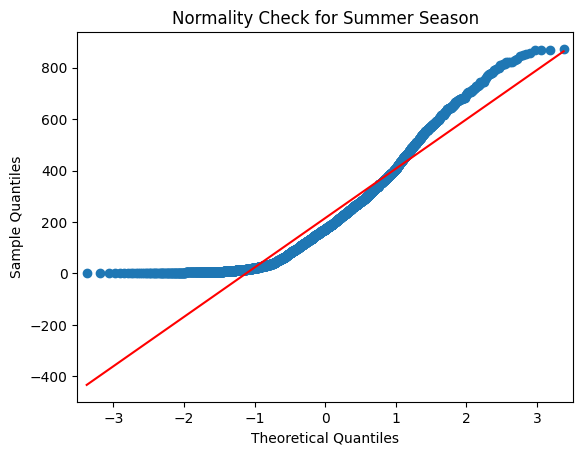

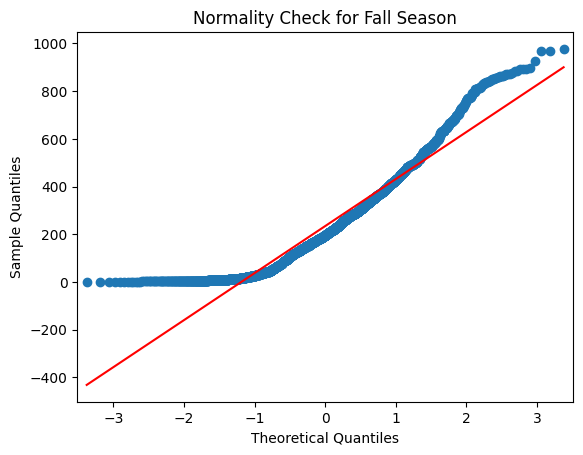

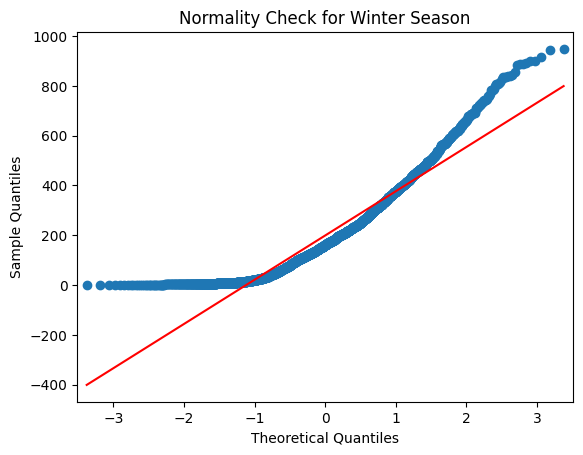

In [54]:
#Normality check using QQ Plot :

sm.qqplot(spring , line = "s" )
plt.title("Normality Check for Spring Season")

sm.qqplot(summer , line = "s")
plt.title("Normality Check for Summer Season")

sm.qqplot(fall , line = "s" )
plt.title("Normality Check for Fall Season")

sm.qqplot(winter , line = "s")
plt.title("Normality Check for Winter Season")

plt.show()

**Insights :**


*   From the QQ Plot we can see that either of the seasons are not normally distributed as most of the data points are distributed away from the line.

**Levenes Test :**

---



**Defining the null and alternate hypothesis :**

**H0 :** The samples have similar varience.

**Ha :** The samples have variable varience.

In [55]:
stat_value , p_value = levene(spring, summer, fall, winter)

print(f"Levene Statistics : {stat_value}")
print(f"p-value : {p_value}")
print()

if p_value < 0.05:
  print("The samples do not have similar varience.")
else:
  print("The samples have similar varience.")


Levene Statistics : 187.7706624026276
p-value : 1.0147116860043298e-118

The samples do not have similar varience.


**Insights :**


*   Levenes test at 95% Confidence Interval proves that the seasons do not have similar varience.


**Shapiro Wilk Test :**

---



**Defining the null and alternate hypothesis :**

**H0 :** The samples follow a normal distribution.

**Ha :** The samples do not follow a normal distribution.

In [56]:
#Normality check for Spring Season

stat , p_value = shapiro(spring)
print(f"Shapiro statistic : {stat}")
print(f"p-value : {p_value}")
print()

if p_value < 0.05:
  print("Spring season doesnot follow Normal Distribution.")
else:
  print("Spring season follows Normal Distribution.")

Shapiro statistic : 0.8087378401253588
p-value : 8.749584618867662e-49

Spring season doesnot follow Normal Distribution.


In [57]:
#Normality check for Summer Season

stat , p_value = shapiro(summer)
print(f"Shapiro statistic : {stat}")
print(f"p-value : {p_value}")
print()

if p_value < 0.05:
  print("Summer season doesnot follow Normal Distribution.")
else:
  print("Summer season follows Normal Distribution.")

Shapiro statistic : 0.9004818080893252
p-value : 6.039374406270491e-39

Summer season doesnot follow Normal Distribution.


In [58]:
#Normality check for Fall Season

stat , p_value = shapiro(fall)
print(f"Shapiro statistic : {stat}")
print(f"p-value : {p_value}")
print()

if p_value < 0.05:
  print("Fall season doesnot follow Normal Distribution.")
else:
  print("Fall season follows Normal Distribution.")

Shapiro statistic : 0.9148166372899196
p-value : 1.043680518918597e-36

Fall season doesnot follow Normal Distribution.


In [59]:
#Normality check for Winter Season

stat , p_value = shapiro(winter)
print(f"Shapiro statistic : {stat}")
print(f"p-value : {p_value}")
print()

if p_value < 0.05:
  print("Winter season doesnot follow Normal Distribution.")
else:
  print("Winter season follows Normal Distribution.")

Shapiro statistic : 0.8954637482095505
p-value : 1.1299244409282836e-39

Winter season doesnot follow Normal Distribution.


**Insight :**


*   From Shapiro Wilk Test at 95% Confidence Interval its clear that seasons are not normally distributed.


**Kruskal Walis Test :**

---



**Defining the null and alternate hypothesis :**

**Ho :** The mean number of cycles rented across all the season is same.

**Ha :** The mean number of cycles rented across all the season is not same.

In [60]:
test_stat , p_value = kruskal(spring, summer, fall, winter)
print(f"Kruskal Statistics : {test_stat}")
print(f"p-value : {p_value}")
print()

if p_value < 0.05:
  print("Reject Null Hypothesis")
  print("The mean number of cycles rented across all the season is not same.")
else :
  print("Fail to Reject Null Hypothesis")
  print("The mean number of cycles rented across all the season is same.")

Kruskal Statistics : 699.6668548181988
p-value : 2.479008372608633e-151

Reject Null Hypothesis
The mean number of cycles rented across all the season is not same.


**Insights :**

*   Here we have to compare between the seasons which are Spring, Summer, Fall, Winter which form categorical variable with a numeric variable (ie) total rides booked , hence we have to use either ANOVA - One way or Kruskal Walis Test as per the normality check.

*  As histogram, QQ Plot, Shapiro Wilk Test and Levenes Test prove that the data is not distributed Normally.Hence we proceeded with Kruskal Walis Test.

*   From the hypothesis testing with 95% confidence interval with significance level 5% the p-value is less than the significane level (ie) alpha.
*   Hence we have to reject the Null hypothesis. Therefore we can conclude that the number of cycles rented on all the seasons is not same.


**ANOVA :**

---



**Defining the null and alternate hypothesis :**

**Ho :** The mean number of cycles rented across all the season is same.

**Ha :** The mean number of cycles rented across all the season is not same.

In [61]:
test_stat , p_value = f_oneway(spring, summer, fall, winter)
print(f"Test Statistics : {test_stat}")
print(f"p-value : {p_value}")
print()

if p_value < 0.05:
  print("Reject Null Hypothesis")
  print("The mean number of cycles rented across all the season is not same.")
else :
  print("Fail to Reject Null Hypothesis")
  print("The mean number of cycles rented across all the season is same.")

Test Statistics : 236.94671081032106
p-value : 6.164843386499654e-149

Reject Null Hypothesis
The mean number of cycles rented across all the season is not same.


**Insight :**

*   From the hypothesis testing one way ANOVA with 95% confidence interval with significance level 5% the p-value is less than the significane level (ie) alpha.
*   Hence we have to reject the Null hypothesis. Therefore we can conclude that the number of cycles rented on all the seasons is not same.




---



# **No. of cycles rented similar or different in different weather**

In [62]:
data.weather.unique()

[1, 2, 3, 4]
Categories (4, int64): [1, 2, 3, 4]

In [63]:
#Statistical Analysis

data.groupby("weather")["count"].describe()

<ipython-input-63-7dbde1874d87>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby("weather")["count"].describe()


,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,7192.0,205.236791,187.959566,1.0,48.0,161.0,305.0,977.0
2,2834.0,178.955540,168.366413,1.0,41.0,134.0,264.0,890.0
3,859.0,118.846333,138.581297,1.0,23.0,71.0,161.0,891.0
4,1.0,164.000000,NaN,164.0,164.0,164.0,164.0,164.0


In [64]:
clear = data[data["weather"]== 1]["count"]
mist = data[data["weather"]== 2]["count"]
light_rain = data[data["weather"]== 3]["count"]
heavy_rain = data[data["weather"]== 4]["count"]

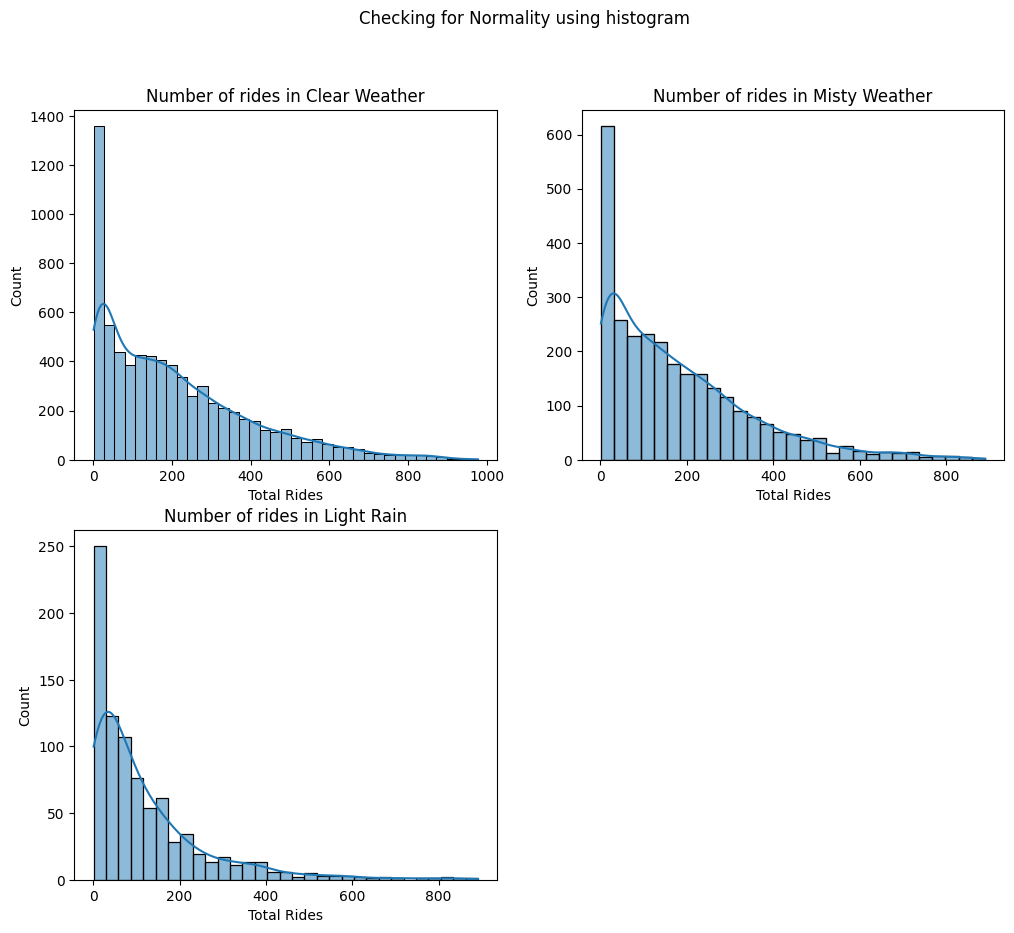

In [65]:
#Normality Check using Histogram:

plt.figure(figsize = (12,10)).suptitle("Checking for Normality using histogram")

plt.subplot(2,2,1)
sns.histplot(clear , kde = True)
plt.xlabel("Total Rides")
plt.title("Number of rides in Clear Weather")

plt.subplot(2,2,2)
sns.histplot(mist , kde = True)
plt.xlabel("Total Rides")
plt.title("Number of rides in Misty Weather")

plt.subplot(2,2,3)
sns.histplot(light_rain , kde = True)
plt.xlabel("Total Rides")
plt.title("Number of rides in Light Rain")

plt.show()

**Insights :**


*   From the histograms we can see that either of the weather are not normally distributed but they are right skewed.


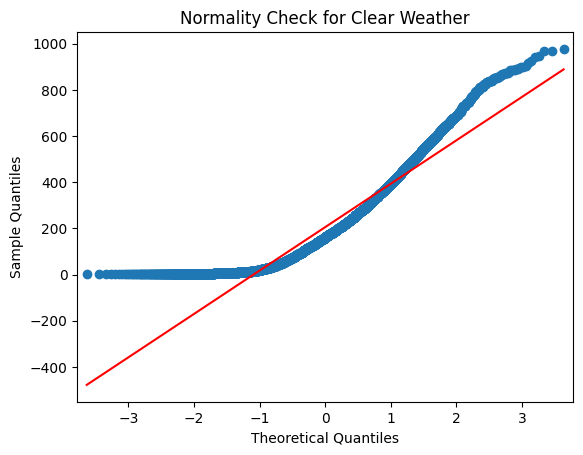

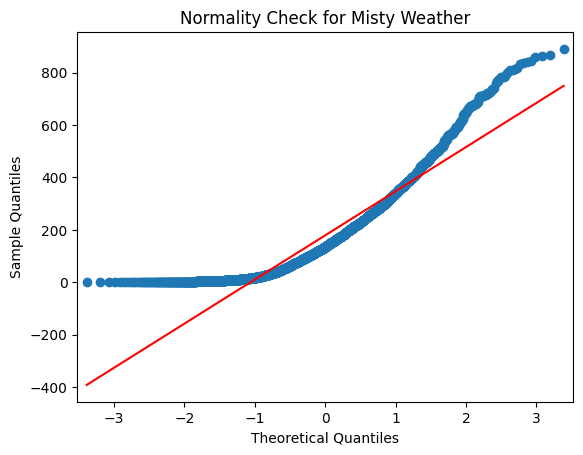

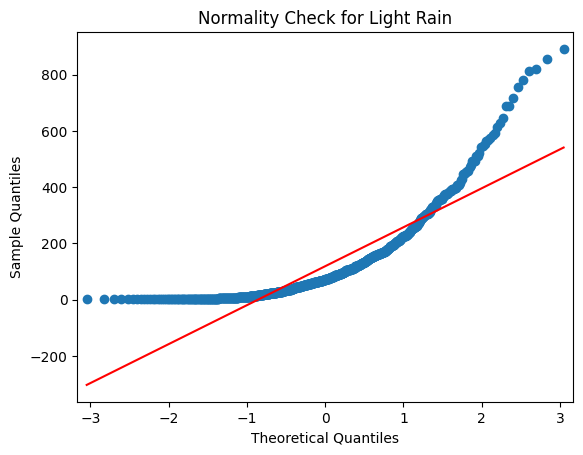

In [66]:
#Normality check using QQ Plot:

sm.qqplot(clear , line = "s" )
plt.title("Normality Check for Clear Weather")

sm.qqplot(mist , line = "s")
plt.title("Normality Check for Misty Weather")

sm.qqplot(light_rain , line = "s" )
plt.title("Normality Check for Light Rain")

plt.show()

**Insights :**


*   From the QQ Plot we can see that either of the weather are not normally distributed as most of the data points are distributed away from the line.

**Levenes Test :**

---



**Defining the null and alternate hypothesis :**

**H0 :** The samples have similar varience.

**Ha :** The samples have variable varience.

In [67]:
stat_value , p_value = levene(clear, mist, light_rain, heavy_rain)

print(f"Levene Statistics : {stat_value}")
print(f"p-value : {p_value}")
print()

if p_value < 0.05:
  print("The samples do not have similar varience.")
else:
  print("The samples have similar varience.")


Levene Statistics : 54.85106195954556
p-value : 3.504937946833238e-35

The samples do not have similar varience.


**Insights :**


*   Levenes test at 95% Confidence Interval proves that the weathers do not have similar varience.


**Shapiro Wilk Test :**

---



**Defining the null and alternate hypothesis :**

**H0 :** The samples follow a normal distribution.

**Ha :** The samples do not follow a normal distribution.

In [68]:
#Normality check for Clear Weather

stat , p_value = shapiro(clear)
print(f"Shapiro statistic : {stat}")
print(f"p-value : {p_value}")
print()

if p_value < 0.05:
  print("Clear weather doesnot follow Normal Distribution.")
else:
  print("Clear weather follows Normal Distribution.")
print()

Shapiro statistic : 0.8909259459740138
p-value : 1.5964921477006555e-57

Clear weather doesnot follow Normal Distribution.



/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7192.
  res = hypotest_fun_out(*samples, **kwds)


In [69]:
#Normality check for Misty Weather

stat , p_value = shapiro(mist)
print(f"Shapiro statistic : {stat}")
print(f"p-value : {p_value}")
print()

if p_value < 0.05:
  print("Misty weather doesnot follow Normal Distribution.")
else:
  print("Misty weather follows Normal Distribution.")

Shapiro statistic : 0.8767694973495206
p-value : 9.777839106111785e-43

Misty weather doesnot follow Normal Distribution.


In [70]:
#Normality check for Light Rain Weather

stat , p_value = shapiro(light_rain)
print(f"Shapiro statistic : {stat}")
print(f"p-value : {p_value}")
print()

if p_value < 0.05:
  print("Light Rain weather doesnot follow Normal Distribution.")
else:
  print("Light Rain weather follows Normal Distribution.")

Shapiro statistic : 0.7674327906035717
p-value : 3.875893017396149e-33

Light Rain weather doesnot follow Normal Distribution.


**Insight :**


*   From Shapiro Wilk Test at 95% Confidence Interval its clear that weathers are not normally distributed.


**Kruskal Walis Test :**

---



**Defining the null and alternate hypothesis :**

**Ho :** The mean number of cycles rented across all the weather is same.

**Ha :** The mean number of cycles rented across all the weather is not same.

In [71]:
test_stat , p_value = kruskal(clear, mist, light_rain, heavy_rain)
print(f"Test Statistics : {test_stat}")
print(f"p-value : {p_value}")
print()

if p_value < 0.05:
  print("Reject Null Hypothesis")
  print("The mean number of cycles rented across all the weather is not same.")
else :
  print("Fail to Reject Null Hypothesis")
  print("The mean number of cycles rented across all the weather is same.")

Test Statistics : 205.00216514479087
p-value : 3.501611300708679e-44

Reject Null Hypothesis
The mean number of cycles rented across all the weather is not same.


**Insights :**

*   Here we have to compare between the weathers which are Clear, Misty, Light Rain, Heavy Rain which form categorical variable with a numeric variable (ie) total rides booked , hence we have to use either ANOVA - One way or Kruskal Walis Test as per the normality check.

*  As histogram, QQ Plot, Shapiro Wilk Test and Levenes Test prove that the data is not distributed Normally.Hence we proceeded with Kruskal Walis Test.

*   From the hypothesis testing with 95% confidence interval with significance level 5% the p-value is less than the significane level (ie) alpha.
*   Hence we have to reject the Null hypothesis. Therefore we can conclude that the number of cycles rented on all the weather is not same.


**ANOVA :**

**Defining the null and alternate hypothesis :**

**Ho :** The mean number of cycles rented across all the weather is same.

**Ha :** The mean number of cycles rented across all the weather is not same.

In [72]:
test_stat , p_value = f_oneway(clear, mist, light_rain, heavy_rain)
print(f"Test Statistics : {test_stat}")
print(f"p-value : {p_value}")
print()

if p_value < 0.05:
  print("Reject Null Hypothesis")
  print("The mean number of cycles rented across all the weather is not same.")
else :
  print("Fail to Reject Null Hypothesis")
  print("The mean number of cycles rented across all the weather is same.")

Test Statistics : 65.53024112793271
p-value : 5.482069475935669e-42

Reject Null Hypothesis
The mean number of cycles rented across all the weather is not same.


**Insight :**

*   From the hypothesis testing one way ANOVA with 95% confidence interval with significance level 5% the p-value is less than the significane level (ie) alpha.
*   Hence we have to reject the Null hypothesis. Therefore we can conclude that the number of cycles rented on all the weather is not same.




---



# **Weather is dependent on season**

In [73]:
#Creating copy of the data

df = data.copy()
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [74]:
#Replacing the masked values in Season and Weather to their actual values.

df["season"].replace({1 : "spring" , 2 : "summer" , 3 : "fall" , 4 : "winter"},inplace = True)
df["weather"].replace({1 : "clear" , 2 : "mist" , 3 : "light_rain" , 4 : "heavy_rain"} , inplace = True)
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,spring,0,0,clear,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,spring,0,0,clear,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,spring,0,0,clear,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,spring,0,0,clear,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,spring,0,0,clear,9.84,14.395,75,0.0,0,1,1


In [75]:
#Creating a crosstab between Season and Weather:

ct = pd.crosstab(df["weather"],df["season"])
ct

season,spring,summer,fall,winter
weather,,,,
clear,1759,1801,1930,1702
mist,715,708,604,807
light_rain,211,224,199,225
heavy_rain,1,0,0,0


**Chi Square Test :**

---



**Defining the null and alternate hypothesis :**

**H0 :** Weather and Season are independent of eachother.

**Ha :** Weather and Season are dependent on eachother.

In [76]:
test_stat , p_value = chi2_contingency(ct)[0] , chi2_contingency(ct)[1]
print(f"Chi2 Statistics : {test_stat}")
print(f"p-value : {p_value}")
print()

if p_value < 0.05:
  print("Reject the Null Hypothesis")
  print("Weather and Season are dependent on each other")
else:
  print("Fail to Reject the Null Hypothesis")
  print("Weather and Season are independent of each other")


Chi2 Statistics : 49.15865559689363
p-value : 1.5499250736864862e-07

Reject the Null Hypothesis
Weather and Season are dependent on each other


**Insight :**

*   Here we have to compare between 2 categorical values which are weather and season, hence we have to go with Chi Square Test.

*   From the hypothesis testing with 95% confidence interval with significance level 5% the p-value is less than the significane level (ie) alpha.
*   Hence we have to reject the Null hypothesis. Therefore we can conclude that weather and season are dependent on each other.


# **Recommendations :**


*   During the rainy weather, the mean of total rental bikes is lower than others. As Yulu provides bike services, customers can't use it in rainy times. so Yulu should provide some roofs or cab services during this weather.

*   As humidity increases the total number of rental bikes decreases, so, Yulu should provide benefits during these humid days.

*   Yulu can increase the use of rental bikes by providing some city tour offers, events, or campaigns during non-working days.

*   Yulu can convert its casual users to registered users by providing some discounts or registration offers to convert casual users to registered users.

*   As mostly there is clear weather, Yulu should focus on the increase in total rental bikes during clear weather days.
*   Yulu can encourage customer feedback to identify areas for improvement and customize services based on insights, exceeding customer expectations.






